# Lab 2 - Exploring Joining strategies

In this lab, we will investigate the joining of the property data from 2004-2015 to the water quality data.  First, we need to 

1. Understand the big picture and determine the key(s) used to join tables.
2. Understand the relationship between tables (one-to-one; one-to-many; many-to-many), and
3. Pick a join type and investigate key mismatches.

## Problem 1 - Understanding the big picture and tables keys

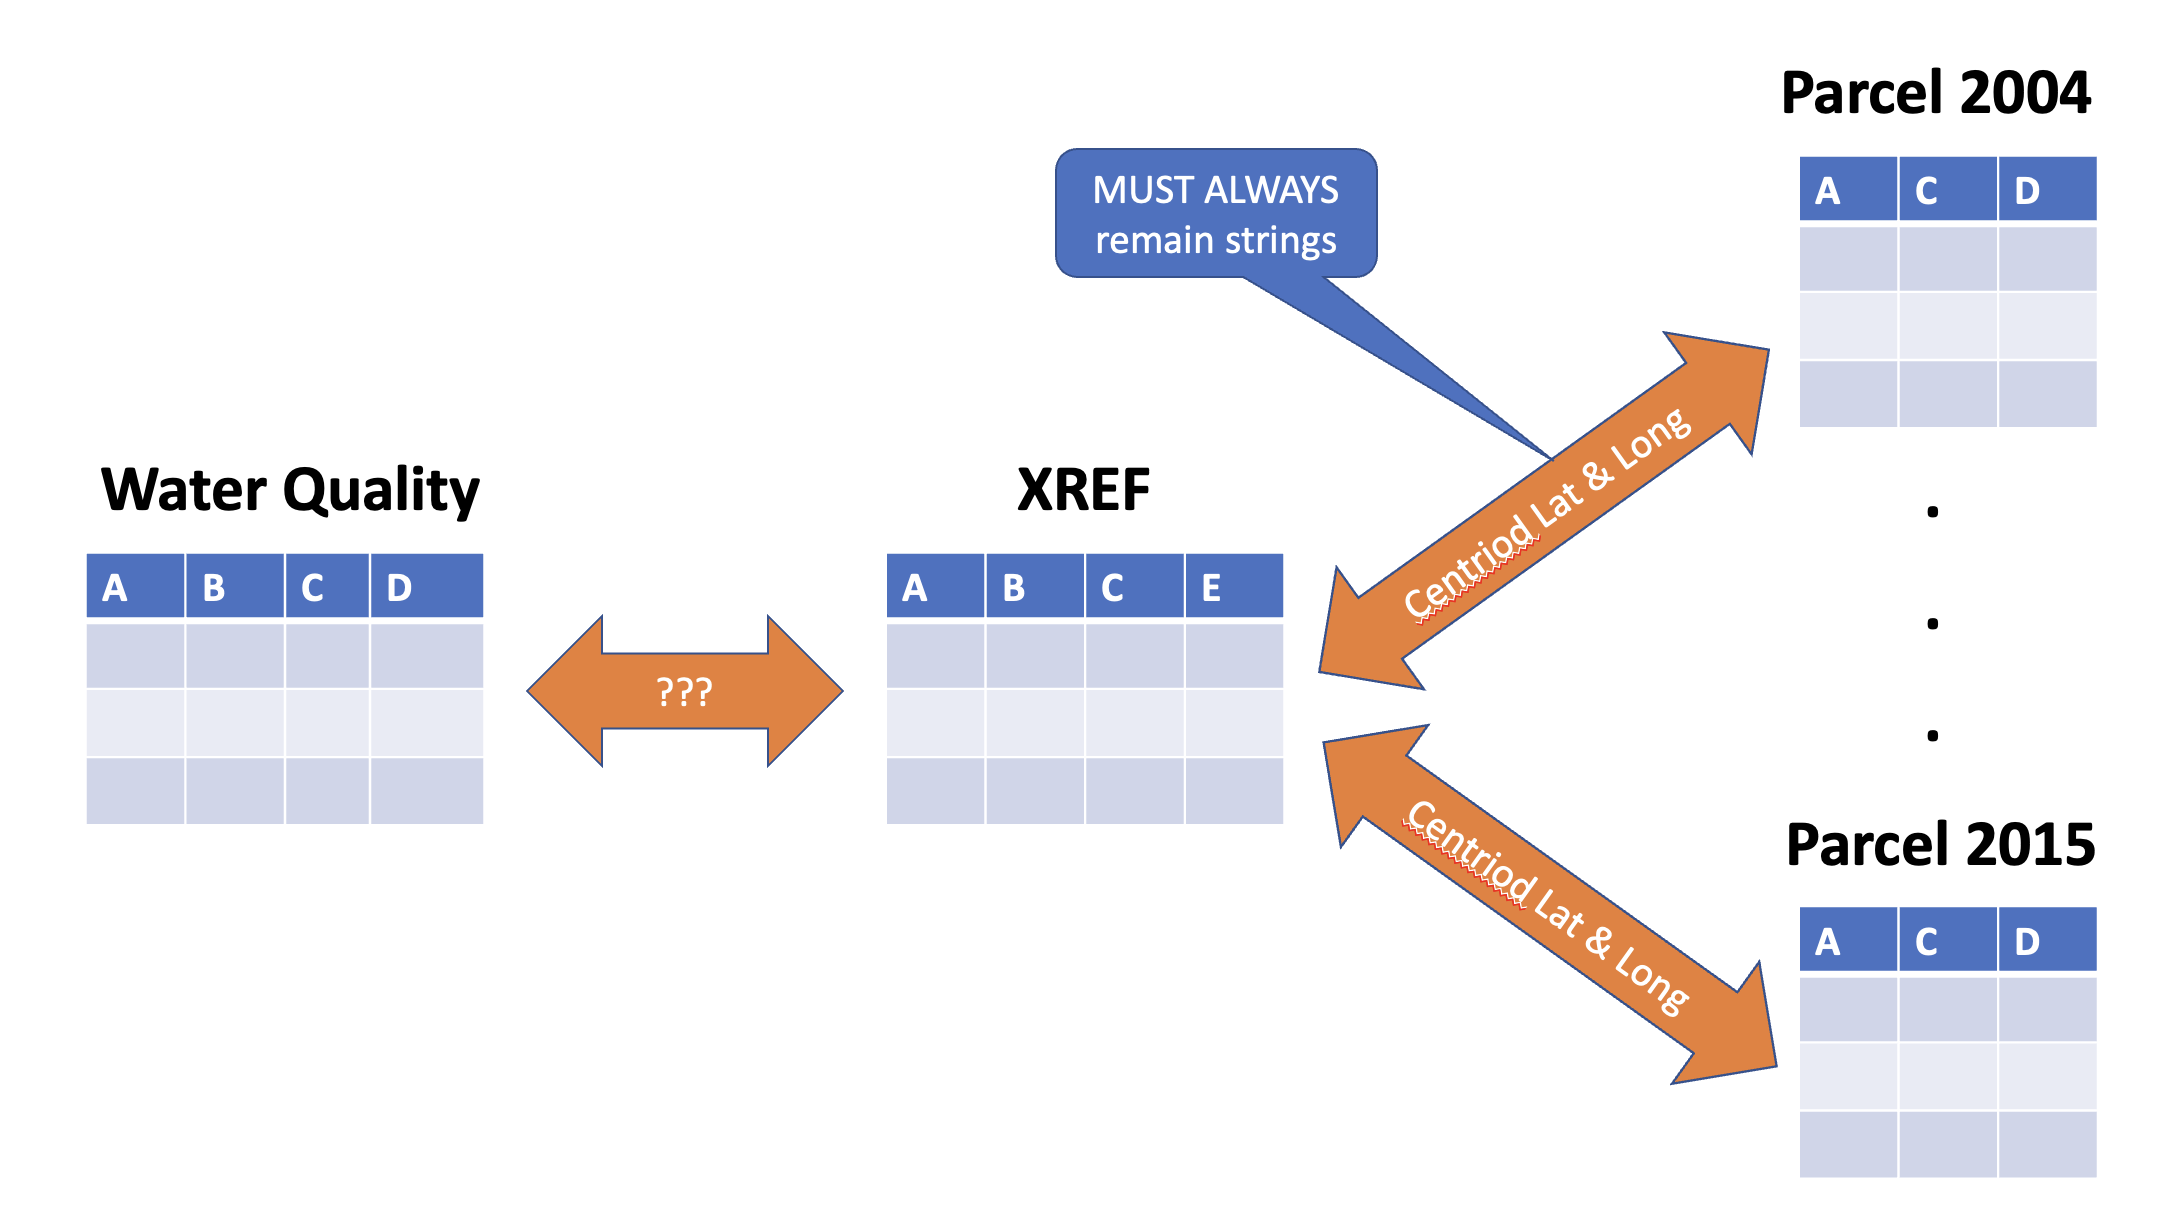

**Task.**  The picture shown above provides a high-level view of the joining process. Remember that our goal is to explain changes in water quality in various lakes over time.  What do you think the structure of the final table should be?  One row per what? Describe some examples of the sort of columns you would want present in this file.

> <font color="orange"> Your thoughts here </font>

In [4]:
from column import column_schema
from cols_data import cols_to_keep
import polars as pl
import polars.selectors as cs
from glob import glob
import re

In [5]:
glob('./data/**/*.txt', recursive=True)

['./data\\2002_metro_tax_parcels.txt',
 './data\\2003_metro_tax_parcels.txt',
 './data\\2004_metro_tax_parcels.txt',
 './data\\2005_metro_tax_parcels.txt',
 './data\\2006_metro_tax_parcels.txt',
 './data\\2007_metro_tax_parcels.txt',
 './data\\2008_metro_tax_parcels.txt',
 './data\\2009_metro_tax_parcels.txt',
 './data\\2010_metro_tax_parcels.txt',
 './data\\2011_metro_tax_parcels.txt',
 './data\\2012_metro_tax_parcels.txt',
 './data\\2013_metro_tax_parcels.txt',
 './data\\2014_metro_tax_parcels.txt',
 './data\\2015_metro_tax_parcels.txt',
 './data\\mces_lakes_1999_2014.txt',
 './data\\mces_lakes_1999_2014_v2.txt',
 './data\\Parcel_Lake_Monitoring_Site_Xref.txt']

In [6]:
schema_override = { 'latitude' : pl.String(),'longitude' : pl.String()}
(mces_lakes := (
 pl.scan_csv(
     'data/mces_lakes_1999_2014_v2.txt', 
     has_header=True,
     separator= '\t',
     infer_schema_length= 10000,
     schema_overrides= schema_override)

 .limit(100)
 .collect()
 ))

PROJECT_ID,DATA_SET_TITLE,LAKE_NAME,CITY,COUNTY,DNR_ID_Site_Number,MAJOR_WATERSHED,WATER_PLANNING_AUTHORITY,LAKE_SITE_NUMBER,START_DATE,START_HOURMIN24,END_DATE,END_HOURMIN24,SAMPLE_DEPTH_IN_METERS,Seasonal_Lake_Grade_RESULT,Seasonal_Lake_Grade_QUALIFIER,Seasonal_Lake_Grade_Units,Physical_Condition_RESULT,Physical_Condition_QUALIFIER,Physical_Condition_Units,Recreational_Suitability_RESULT,Recreational_Suitability_QUALIFIER,Recreational_Suitability_Units,Secchi_Depth_RESULT_SIGN,Secchi_Depth_RESULT,Secchi_Depth_QUALIFIER,Secchi_Depth_Units,Total_Phosphorus_RESULT_SIGN,Total_Phosphorus_RESULT,Total_Phosphorus_QUALIFIER,Total_Phosphorus_Units,longitude,latitude
i64,str,str,str,str,str,str,str,i64,str,str,str,str,f64,i64,str,str,i64,str,str,i64,str,str,str,f64,str,str,str,f64,str,str,str,str
7108,"""Citizen Assisted Monitoring Pr…","""Acorn Lake""","""Oakdale""","""Washington""","""82010200-01""","""Lower St. Croix River""","""Valley Branch WD""",1,"""2006-04-16""","""0:00""","""2006-04-16""","""0:00""",0.0,null,null,"""0-4 Categorical Calculated Sea…",1,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",5,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",null,1.0,"""Approved""","""m""",null,0.156,"""Approved""","""mg/L""","""-92.97171054""","""45.01655642"""
7108,"""Citizen Assisted Monitoring Pr…","""Acorn Lake""","""Oakdale""","""Washington""","""82010200-01""","""Lower St. Croix River""","""Valley Branch WD""",1,"""2006-05-01""","""0:00""","""2006-09-30""","""0:00""",0.0,2,"""Approved""","""0-4 Categorical Calculated Sea…",null,null,"""1-5 Categorical: 1 good & 5 ba…",null,null,"""1-5 Categorical: 1 good & 5 ba…",null,null,null,"""m""",null,null,null,"""mg/L""","""-92.97171054""","""45.01655642"""
7108,"""Citizen Assisted Monitoring Pr…","""Acorn Lake""","""Oakdale""","""Washington""","""82010200-01""","""Lower St. Croix River""","""Valley Branch WD""",1,"""2006-05-02""","""0:00""","""2006-05-02""","""0:00""",0.0,null,null,"""0-4 Categorical Calculated Sea…",1,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",5,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",null,0.66,"""Approved""","""m""",null,0.107,"""Approved""","""mg/L""","""-92.97171054""","""45.01655642"""
7108,"""Citizen Assisted Monitoring Pr…","""Acorn Lake""","""Oakdale""","""Washington""","""82010200-01""","""Lower St. Croix River""","""Valley Branch WD""",1,"""2006-05-16""","""0:00""","""2006-05-16""","""0:00""",0.0,null,null,"""0-4 Categorical Calculated Sea…",2,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",5,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",null,0.66,"""Approved""","""m""",null,0.141,"""Approved""","""mg/L""","""-92.97171054""","""45.01655642"""
7108,"""Citizen Assisted Monitoring Pr…","""Acorn Lake""","""Oakdale""","""Washington""","""82010200-01""","""Lower St. Croix River""","""Valley Branch WD""",1,"""2006-05-30""","""0:00""","""2006-05-30""","""0:00""",0.0,null,null,"""0-4 Categorical Calculated Sea…",2,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",5,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",null,0.5,"""Approved""","""m""",null,0.029,"""Approved""","""mg/L""","""-92.97171054""","""45.01655642"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
7108,"""Citizen Assisted Monitoring Pr…","""Alimagnet Lake""","""Burnsville""","""Dakota""","""19002100-01""","""Mississippi River - Lake Pepin""","""Vermillion River Watershed JPO""",1,"""1999-05-14""","""12:00""","""1999-05-14""","""12:00""",0.0,null,null,"""0-4 Categorical Calculated Sea…",2,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",2,"""Approved""","""1-5 Categorical: 1 good & 5 ba…",null,2.1,"""Approved""","""m""",null,0.04,"""Approved""","""mg/L""","""-93.24821298""","""44.74812624"""
7108,"""Citizen Assisted Monitoring Pr…","""Alimagnet Lake""","""Burnsville""","""Dakota""","""19002100-01""","""Mississippi River - Lake Pepin""","""Vermillion River Watershed JPO""",1,"""1999-05-15""","""19:00""","""1999-05-15""","""19:00""",0.0,null,null,"""0-4

In [7]:
(parcel_lake_xref := (
 pl.scan_csv(
     'data/Parcel_Lake_Monitoring_Site_Xref.txt', 
     has_header=True,
     separator= '\t',)
 .limit(100)
 .collect()
 ))

Parcel_PIN,Monit_MAP_CODE1,Monit_SITE_CODE,Monit_LAKE_SITE,Distance_Parcel_Monitoring_Site_meters,Lake_Hydroid,Distance_Parcel_Lake_meters,centroid_long,centroid_lat,Parcel_pkey
str,str,i64,i64,f64,i64,f64,f64,f64,i64
null,"""19007900-01""",19007900,1,2815.49271,110517277058,2571.526792,-93.11451,44.94283,2163034
null,"""19007900-01""",19007900,1,2753.474688,110517277058,2515.373802,-93.11539,44.94234,2163035
null,"""19007900-01""",19007900,1,2748.810665,110517277058,2511.924959,-93.11556,44.94231,2163036
null,"""19007900-01""",19007900,1,2738.750056,110517277058,2502.99164,-93.11572,44.94223,2163037
null,"""19007900-01""",19007900,1,2700.541412,110517277058,2465.206234,-93.1158,44.94189,2163038
…,…,…,…,…,…,…,…,…,…
null,"""02004200-01""",2004200,1,6873.761858,110208412770,2270.762337,-93.2247,45.32081,1917269
null,"""02005300-01""",2005300,1,4921.073777,110208412730,4417.528519,-93.22211,45.30155,1917270
null,"""02005300-01""",2005300,1,4841.926764,110208412730,4291.816878,-93.21673,45.30076,1917271


MCES lakes data set , the key column is DNR_ID_Site_number
Parcel lake Monitoring site Xref the key column is Monibt_MAP_CODE1

## Problem 2 - Understanding the big picture and tables keys

**Tasks.**  Perform each of the following task.  Any task that requires data management should be performed separately in both `polars` and `pandas` using lazy data frames.

1. Use a lazy data frame to inspect the columns and a few rows of data. 
2. Suggest the columns that will be used as keys to join the tables.
3. One set of keys are floating point numbers (which?).  Discuss the potential problems with using floating point numbers as keys.  Suggest possible remedies.
3. To understand the relationship (one-to-one; one-to-many; many-to-many) between tables, select the key columns, perform aggregation on each table to determine if there is one or many keys per row.
4. Based on the results of the last task, suggest a join type and justify your response.

In [8]:
# Place your code/thoughts in one or more code/markdown cells, respectively.

In [9]:
# You polars code here
from column import column_schema
from cols_data import cols_to_keep
import polars as pl
import polars.selectors as cs
from glob import glob
import re
from functools import reduce

In [10]:
(water_quality_keys := (
    pl.scan_csv(
        'data/mces_lakes_1999_2014_v2.txt',
        has_header=True,
        separator= '\t',
     infer_schema_length= 10000,
     schema_overrides= schema_override
     )
     .select(['DNR_ID_Site_Number', 'LAKE_NAME'])
     .unique()
     .with_columns(pl.lit(1).alias('water_qulaity'))
     .collect()
))


DNR_ID_Site_Number,LAKE_NAME,water_qulaity
str,str,i32
"""10009300-01""","""Oak Lake""",1
"""70001800-01""","""Cates Lake""",1
"""10008600-01""","""Patterson Lake""",1
"""10006800-01""","""Myers Lake""",1
"""70009100-02""","""Cedar Lake""",1
…,…,…
"""27018401-01""","""Whaletail Lake""",1
"""27009400-01""","""Lone Lake""",1
"""82004600-01""","""Square Lake""",1


In [11]:
(xref_keys := (
    pl.scan_csv(
        'data/Parcel_Lake_Monitoring_Site_Xref.txt',
        has_header=True,
        separator= '\t',
     )
     .select(['Monit_MAP_CODE1' ])
     .unique()
     .with_columns(pl.lit(1).alias('xref'))
     .collect()
))


Monit_MAP_CODE1,xref
str,i32
"""19003300-01""",1
"""27006500-01""",1
"""27011102-01""",1
"""82006500-01""",1
"""13004200-01""",1
…,…
"""70006100-01""",1
"""10001800-01""",1
"""27007800-01""",1


## Problem 3 - Make join key indicator tables - Water Quality VS XREF

Now that you have identified the keys for joining the water quality file with the XREF, make an indicator column table as shown below.

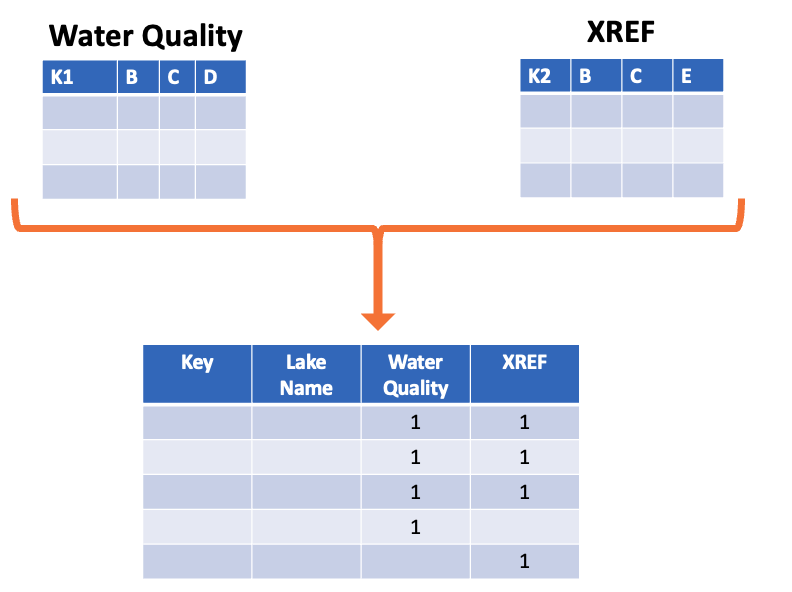

Use this table to explore all mismatches

In [12]:
# Your code here
(indcator_table := water_quality_keys.join(
    xref_keys,
    left_on='DNR_ID_Site_Number',
    right_on='Monit_MAP_CODE1',
    how='outer'
).fill_null(0))


C:\Users\ym5765bo\AppData\Local\Temp\ipykernel_3956\3341877346.py:2: DeprecationWarning: use of `how='outer'` should be replaced with `how='full'`.
(Deprecated in version 0.20.29)
  (indcator_table := water_quality_keys.join(


DNR_ID_Site_Number,LAKE_NAME,water_qulaity,Monit_MAP_CODE1,xref
str,str,i32,str,i32
"""19003300-01""","""Earley Lake""",1,"""19003300-01""",1
"""27006500-01""","""Magda Lake""",1,"""27006500-01""",1
"""27011102-01""","""Pike Lake""",1,"""27011102-01""",1
"""82006500-01""","""Hay Lake""",1,"""82006500-01""",1
"""13004200-01""","""Birch Lake""",1,"""13004200-01""",1
…,…,…,…,…
"""13010300-01""","""Lendt Lake""",1,null,0
"""40002700-01""","""Sanborn Lake""",1,null,0
"""13002200-01""","""Fourth Lake""",1,null,0


In [13]:
indcator_table.filter(pl.col('xref')==0)

DNR_ID_Site_Number,LAKE_NAME,water_qulaity,Monit_MAP_CODE1,xref
str,str,i32,str,i32
"""13010300-01""","""Lendt Lake""",1,null,0
"""40002700-01""","""Sanborn Lake""",1,null,0
"""13002200-01""","""Fourth Lake""",1,null,0
"""13005300-01""","""Big Comfort Lake""",1,null,0
"""66006100-01""","""Cody Lake""",1,null,0


In [14]:
indcator_table.filter(pl.col('water_qulaity')==0)

DNR_ID_Site_Number,LAKE_NAME,water_qulaity,Monit_MAP_CODE1,xref
str,str,i32,str,i32
null,null,0,"""82010600-03""",1
null,null,0,"""99001184-02""",1
null,null,0,"""27011101-01""",1
null,null,0,"""82000100-08""",1
null,null,0,"""82016700-02""",1
…,…,…,…,…
null,null,0,"""10004402-01""",1
null,null,0,"""27008600-01""",1
null,null,0,"""19006500-02""",1


## Problem 4 - Make an indicator column for the lat/long keys XREF VS parcel files.

To explore mismatches based on the lat/long keys, we will make another indicator table as shown below.

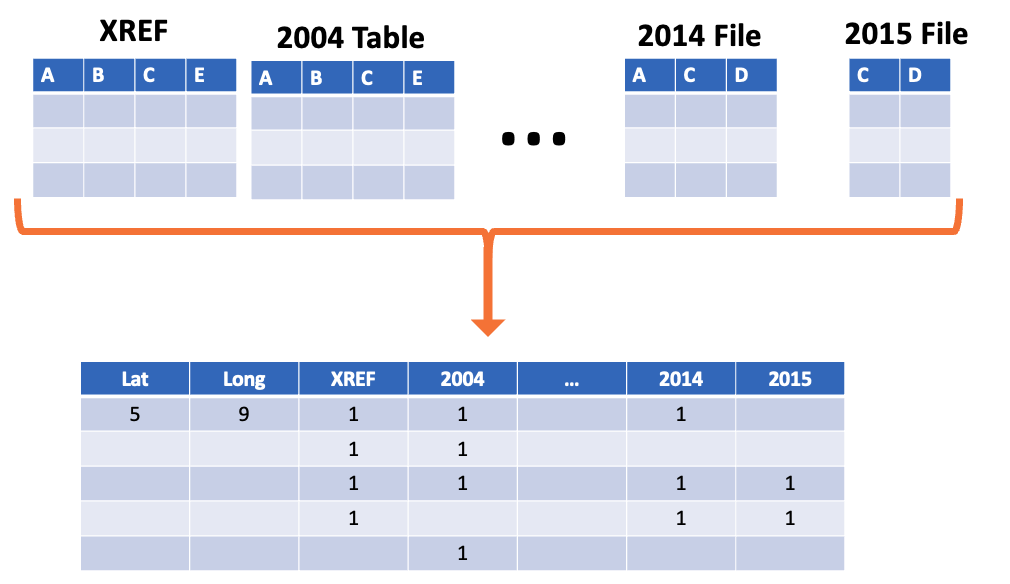

Again, use this table to explore all mismatches.

**Important.** Be sure to read the lat/long columns as strings!

In [15]:
# Your code here

year_pattern = re.compile (r'(\d{4})_metro_tax_parcels')
getyear =lambda path: (n.group(1) if (n := year_pattern. search(path))else None)

In [16]:
(parcel_path := sorted([p 
                 for p in (glob('./data/**/*.txt', recursive=True)) 
                 if 'parcel' in p
    ]))

['./data\\2002_metro_tax_parcels.txt',
 './data\\2003_metro_tax_parcels.txt',
 './data\\2004_metro_tax_parcels.txt',
 './data\\2005_metro_tax_parcels.txt',
 './data\\2006_metro_tax_parcels.txt',
 './data\\2007_metro_tax_parcels.txt',
 './data\\2008_metro_tax_parcels.txt',
 './data\\2009_metro_tax_parcels.txt',
 './data\\2010_metro_tax_parcels.txt',
 './data\\2011_metro_tax_parcels.txt',
 './data\\2012_metro_tax_parcels.txt',
 './data\\2013_metro_tax_parcels.txt',
 './data\\2014_metro_tax_parcels.txt',
 './data\\2015_metro_tax_parcels.txt']

In [17]:
(parcel_latlong_tables := [(
    pl.scan_csv(
        path,
        has_header=True,
        separator= '|',
        schema_overrides= {'centroid_lat': pl.String(), 'centroid_long':pl.String()}
     ).select({'centroid_lat', 'centroid_long'})
     .unique()
     .with_columns(pl.lit(1).alias(getyear(path)))
     .collect()
)
     for path in parcel_path
])

[shape: (1_103_310, 3)
 ┌──────────────┬───────────────┬──────┐
 │ centroid_lat ┆ centroid_long ┆ 2002 │
 │ ---          ┆ ---           ┆ ---  │
 │ str          ┆ str           ┆ i32  │
 ╞══════════════╪═══════════════╪══════╡
 │ 44.89297     ┆ -93.53006     ┆ 1    │
 │ 45.05065     ┆ -93.25759     ┆ 1    │
 │ 45.04348     ┆ -92.84226     ┆ 1    │
 │ 44.93089     ┆ -92.94114     ┆ 1    │
 │ 44.75015     ┆ -93.30202     ┆ 1    │
 │ …            ┆ …             ┆ …    │
 │ 44.67077     ┆ -93.17592     ┆ 1    │
 │ 45.06867     ┆ -93.08636     ┆ 1    │
 │ 44.72116     ┆ -93.21972     ┆ 1    │
 │ 44.97528     ┆ -93.49517     ┆ 1    │
 │ 44.77071     ┆ -93.27528     ┆ 1    │
 └──────────────┴───────────────┴──────┘,
 shape: (1_117_593, 3)
 ┌──────────────┬───────────────┬──────┐
 │ centroid_lat ┆ centroid_long ┆ 2003 │
 │ ---          ┆ ---           ┆ ---  │
 │ str          ┆ str           ┆ i32  │
 ╞══════════════╪═══════════════╪══════╡
 │ 44.91198     ┆ -93.09688     ┆ 1    │
 │ 45.0611

In [ ]:
join_next= lambda left, right: left.join (
    right, 
    on=['centroid_lat', 'centroid_long'],
    how='inner'
).drop(['centroid_lat', 'centroid_long'])

In [19]:
join_next(parcel_latlong_tables[0], parcel_latlong_tables [1])

centroid_lat,centroid_long,2002,2003
str,str,i32,i32
"""44.91198""","""-93.09688""",1,1
"""45.06117""","""-93.00182""",1,1
"""45.12234""","""-92.99008""",1,1
"""45.08882""","""-93.21035""",1,1
"""44.8464""","""-93.37387""",1,1
…,…,…,…
"""44.9258""","""-93.1555""",1,1
"""44.71722""","""-93.27552""",1,1
"""44.94502""","""-93.29412""",1,1


In [20]:
(xref_latlong_table := 
 pl.scan_csv(
      'data/Parcel_Lake_Monitoring_Site_Xref.txt',
        has_header=True,
        separator= '\t',
        schema_overrides= {'centroid_lat': pl.String(), 'centroid_long':pl.String()}
     )
     .select(['centroid_lat', 'centroid_long'])
     .unique()
     .with_columns(pl.lit(1).alias('xref'))
     .collect()
)


centroid_lat,centroid_long,xref
str,str,i32
"""44.86511""","""-93.37339""",1
"""44.68076""","""-93.27924""",1
"""44.95476""","""-93.06463""",1
"""44.90652""","""-93.32554""",1
"""44.59904""","""-93.71581""",1
…,…,…
"""45.01133""","""-93.50774""",1
"""44.95129""","""-93.34072""",1
"""44.72707""","""-93.45277""",1


make sure to remove 2002 and 2003

In [21]:
(final_indicator_table := (
    reduce(
        join_next,
        parcel_latlong_tables,
        xref_latlong_table
    )
    .filter(~(pl.col('centroid_lat').is_null()|  pl.col('centroid_long').is_null()))
    .fill_null(0)
    .drop(['2003', '2002'])
    .with_columns(total_years =pl.sum_horizontal(cs.starts_with('20')))
))

centroid_lat,centroid_long,xref,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,total_years
str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""44.75951""","""-93.25069""",1,1,1,1,1,1,1,1,1,1,1,1,1,12
"""44.86753""","""-93.04538""",1,1,1,1,1,1,1,1,1,1,1,1,1,12
"""45.00339""","""-93.1132""",1,1,1,1,1,1,1,1,1,1,1,1,1,12
"""45.11199""","""-93.04304""",1,1,1,1,1,1,1,1,1,1,1,1,1,12
"""44.94""","""-92.82468""",1,1,1,1,1,1,1,1,1,1,1,1,1,12
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""44.96379""","""-93.10063""",1,1,1,1,1,1,1,1,1,1,1,1,1,12
"""45.06377""","""-93.06011""",1,1,1,1,1,1,1,1,1,1,1,1,1,12
"""44.8321""","""-92.97942""",1,1,1,1,1,1,1,1,1,1,1,1,1,12


In [22]:
final_indicator_table.filter(pl.col('xref')==0)

centroid_lat,centroid_long,xref,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,total_years
str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32


In [23]:
final_indicator_table.filter(pl.col('total_years')==0)

centroid_lat,centroid_long,xref,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,total_years
str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
